In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_file = 'data/continuous_dataset.csv'
df = pd.read_csv(data_file)

data_file = 'data/weekly_pre-dispatch_forecast.csv'
df_forecast_pre_dispatch = pd.read_csv(data_file)

In [4]:
# This dataset contains the feature variables and dependent variable datetime.
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


In [5]:
# Load forecast in the pre dispatch reports is the prediction made by the grid operator.
# This is not a feature for our model but could be compared with our predictions as an exploratory activity.
df_forecast_pre_dispatch

,datetime,load_forecast
0,1/2/2016 0:00,1056.9
1,1/2/2016 1:00,1057.1
2,1/2/2016 2:00,996.5
3,1/2/2016 3:00,955.8
4,1/2/2016 4:00,918.0
...,...,...
40147,7/31/2020 19:00,1181.4
40148,7/31/2020 20:00,1196.8
40149,7/31/2020 21:00,1163.3
40150,7/31/2020 22:00,1136.0


In [6]:
df.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000
mean,1182.868647,27.399111,0.018313,0.079979,13.391049,26.921023,0.017844,0.106265,7.046675,24.719513,0.016867,0.144681,3.567589,0.704795,0.062937,0.727793
std,192.068896,1.675462,0.001607,0.065589,7.295502,3.018129,0.001889,0.086293,4.103711,2.414019,0.001584,0.087899,1.710522,3.147470,0.242852,0.445100
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010247,0.000009,0.060394,19.933740,0.009655,0.000032,0.015497,0.000000,0.000000,0.000000
25%,1020.056900,26.160455,0.017236,0.026451,7.544958,24.769281,0.016584,0.036819,3.955051,22.954652,0.015800,0.075775,2.298887,0.000000,0.000000,0.000000
50%,1168.427700,27.118051,0.018590,0.065201,12.182103,26.167352,0.018351,0.085968,5.992762,24.001718,0.017167,0.130188,3.413994,0.000000,0.000000,1.000000
75%,1327.563950,28.558344,0.019521,0.117310,18.661282,28.712335,0.019242,0.157288,9.409871,26.243402,0.018067,0.200012,4.670628,0.000000,0.000000,1.000000
max,1754.882000,35.039575,0.022690,0.521240,39.229726,39.063440,0.022165,0.484985,24.483937,34.216211,0.021066,0.477783,10.288902,22.000000,1.000000,1.000000


In [7]:
# Checking if there are missing values. None found.
df.isna().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [8]:
# Making columns lower case for better readability.
df.columns = df.columns.str.lower()
df

,datetime,nat_demand,t2m_toc,qv2m_toc,tql_toc,w2m_toc,t2m_san,qv2m_san,tql_san,w2m_san,t2m_dav,qv2m_dav,tql_dav,w2m_dav,holiday_id,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


In [9]:
# Check the data types of the variables
df.dtypes

datetime       object
nat_demand    float64
t2m_toc       float64
qv2m_toc      float64
tql_toc       float64
w2m_toc       float64
t2m_san       float64
qv2m_san      float64
tql_san       float64
w2m_san       float64
t2m_dav       float64
qv2m_dav      float64
tql_dav       float64
w2m_dav       float64
holiday_id      int64
holiday         int64
school          int64
dtype: object

In [10]:
# Checking if variable `school` has non-boolean values
df.school.value_counts()

1    34969
0    13079
Name: school, dtype: int64

In [11]:
# Checking if variable `holiday` has non-boolean values
df.holiday.value_counts()

0    45024
1     3024
Name: holiday, dtype: int64

Checking if 0's in `holiday_id` matches the number of holidays based on `holiday`.

In [12]:
assert df.holiday_id.value_counts()[0] == df.holiday.value_counts()[0]

In [13]:
# datetime is a string. Splitting it to multiple columns will make plotting easier.
# Therefore, creating a new variable called `dt` of type pd.datetime by converting the values from `df.datetime`.
df['dt'] = pd.to_datetime(df.datetime, format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Checking if there are datetime conversion errors.
assert df.dt.isnull().sum() == 0

# delete datetime from the dataframe as dt supersedes it now.
del df['datetime']

In [14]:
df

,nat_demand,t2m_toc,qv2m_toc,tql_toc,w2m_toc,t2m_san,qv2m_san,tql_san,w2m_san,t2m_dav,qv2m_dav,tql_dav,w2m_dav,holiday_id,holiday,school,dt
0,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0,2015-01-03 01:00:00
1,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0,2015-01-03 02:00:00
2,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0,2015-01-03 03:00:00
3,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0,2015-01-03 04:00:00
4,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0,2015-01-03 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1,2020-06-26 20:00:00
48044,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1,2020-06-26 21:00:00
48045,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1,2020-06-26 22:00:00
48046,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1,2020-06-26 23:00:00


In [15]:
df['dt_year'] = df['dt'].dt.year
df['dt_month'] = df['dt'].dt.month
df['dt_day'] = df['dt'].dt.day
df['dt_hour'] = df['dt'].dt.hour

# No need to separate minute and second values as they are always 0. Verified and confirmed.
# df['dt_minute'] = df.datetime.dt.minute
# df['dt_second'] = df.datetime.dt.second


In [16]:
# Visually check all dt variables that they've been split correctly from a semantic viewpoint.
# Programmatic check was done above by checking for conversion errors.
df[df.columns[df.columns.str.match('^dt.*')]][::100]

,dt,dt_year,dt_month,dt_day,dt_hour
0,2015-01-03 01:00:00,2015,1,3,1
100,2015-01-07 05:00:00,2015,1,7,5
200,2015-01-11 09:00:00,2015,1,11,9
300,2015-01-15 13:00:00,2015,1,15,13
400,2015-01-19 17:00:00,2015,1,19,17
...,...,...,...,...,...
47600,2020-06-08 09:00:00,2020,6,8,9
47700,2020-06-12 13:00:00,2020,6,12,13
47800,2020-06-16 17:00:00,2020,6,16,17
47900,2020-06-20 21:00:00,2020,6,20,21


In [17]:
df.groupby(by=['dt_year', 'dt_month']).size()

dt_year  dt_month
2015     1           695
         2           672
         3           744
         4           720
         5           744
                    ... 
2020     2           696
         3           744
         4           720
         5           744
         6           625
Length: 66, dtype: int64

In [18]:
# df[['t2m_toc', 't2m_san', 't2m_dav', 'dt_year', 'dt_month']].groupby(by=['dt_year', 'dt_month'], group_keys=True).max().plot().bar()

In [19]:
# distribution of the target variable
# %matplotlib inline
# plt.figure(figsize=(10,10))
# sns.histplot(df.nat_demand)
# sns.histplot(y_pred, color='red', bins=50, alpha=0.5)

df.dtypes

nat_demand           float64
t2m_toc              float64
qv2m_toc             float64
tql_toc              float64
w2m_toc              float64
t2m_san              float64
qv2m_san             float64
tql_san              float64
w2m_san              float64
t2m_dav              float64
qv2m_dav             float64
tql_dav              float64
w2m_dav              float64
holiday_id             int64
holiday                int64
school                 int64
dt            datetime64[ns]
dt_year                int64
dt_month               int64
dt_day                 int64
dt_hour                int64
dtype: object

In [20]:
df.nat_demand

0         970.3450
1         912.1755
2         900.2688
3         889.9538
4         893.6865
           ...    
48043    1128.5592
48044    1112.7488
48045    1081.5680
48046    1041.6240
48047    1013.5683
Name: nat_demand, Length: 48048, dtype: float64

<AxesSubplot: xlabel='nat_demand', ylabel='Count'>

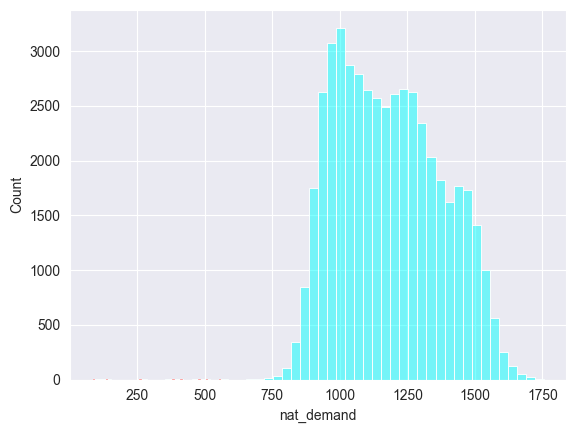

In [69]:
sns.histplot(df.nat_demand, color='aqua', bins=50, alpha=0.5)

<AxesSubplot: xlabel='nat_demand', ylabel='Count'>

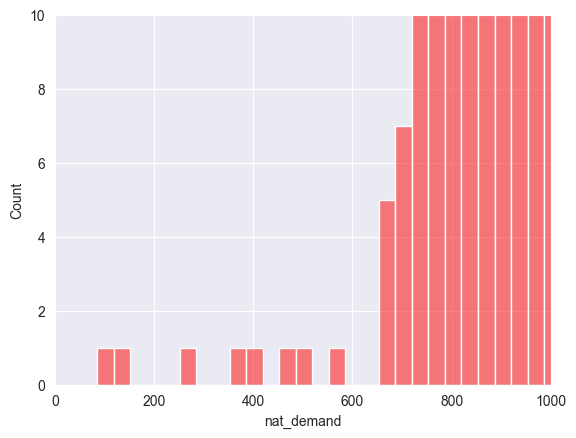

In [71]:
# Focusing on the long tail on the left. They seem to be outliers.
plt.xlim(0, 1000)
plt.ylim(0, 10)
sns.histplot(df.nat_demand, color='red', bins=50, alpha=0.5)

In [75]:
# Looks like there are 8 very low demands. This is only a 0.017% of the total records.
# Without these outliers the national demand values are 'normally' distributed.
# Therefore, no need to log1p() the values.
round(df.nat_demand[df.nat_demand < 600].size / len(df.nat_demand) *100, 3)

0.017

<AxesSubplot: xlabel='nat_demand', ylabel='Count'>

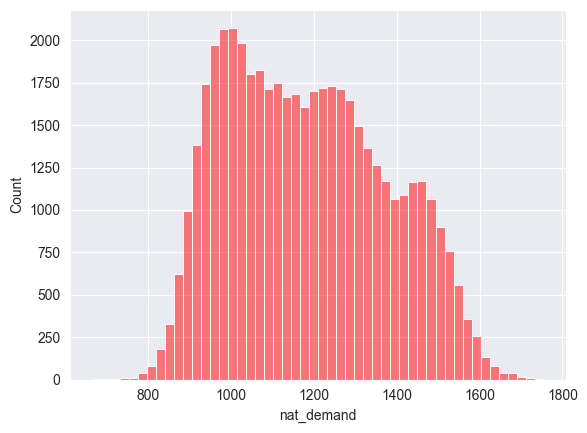

In [63]:
sns.histplot(df.nat_demand[df.nat_demand > 600], color='red', bins=50, alpha=0.5)